In [336]:
import pandas as pd
import numpy as np
import sklearn

In [337]:
df= pd.read_csv('Country-data.csv')

In [338]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [149]:
df['country'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object>

In [150]:
df.info()
#همه داده ها عددی هستند پس نیاز به تبدیل نیست

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


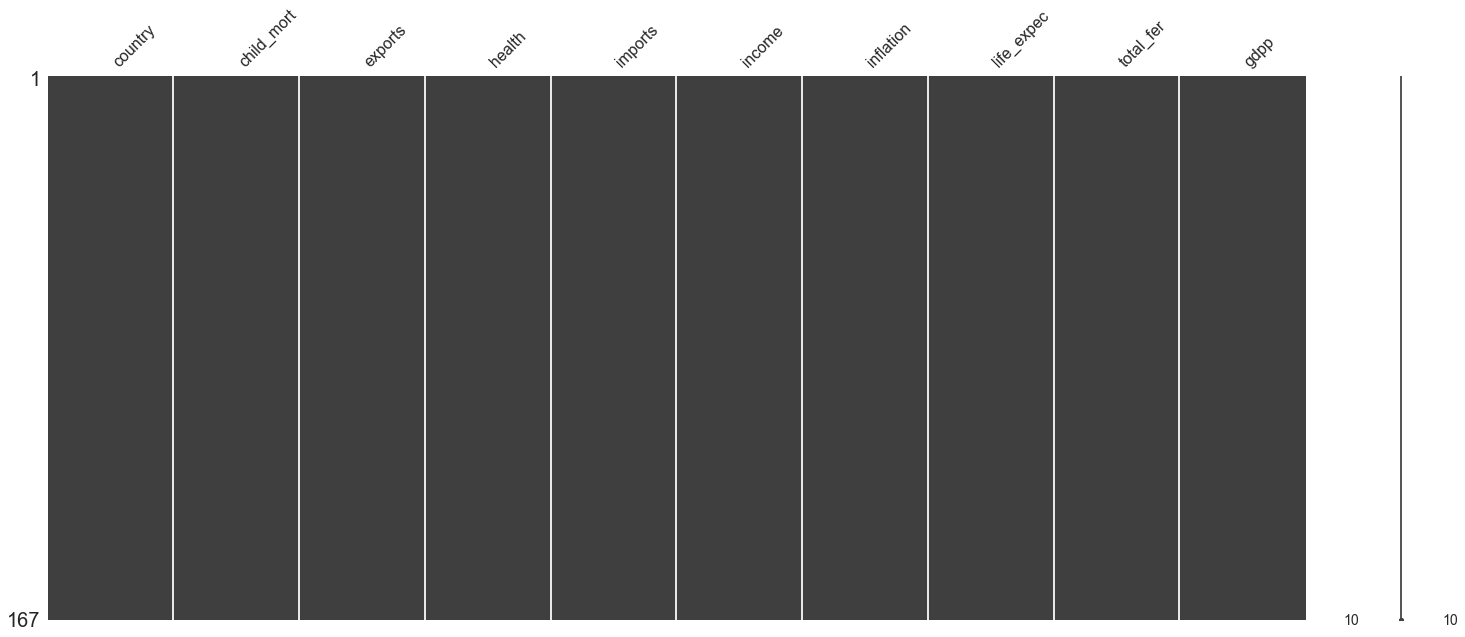

<Figure size 576x396 with 0 Axes>

In [151]:
import missingno as msno
from matplotlib import pyplot as plt
msno.matrix(df)
plt.figure()
plt.show()
# داده نال نداریم پس به مرحله بعدی میرویم

In [152]:
df.describe()
#اطلاعات کلی داده

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


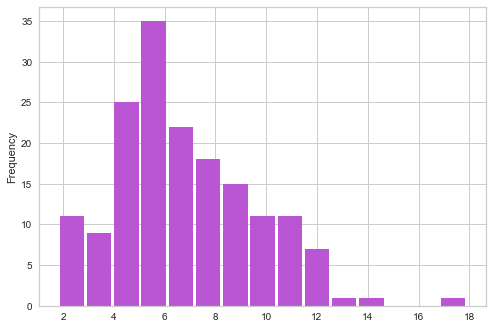

In [153]:
df['health'].plot(kind = 'hist', bins= 15 ,rwidth=0.9, color='mediumorchid');
#نحوه توزیع هیستوگرامی ستون سلامت

<AxesSubplot:>

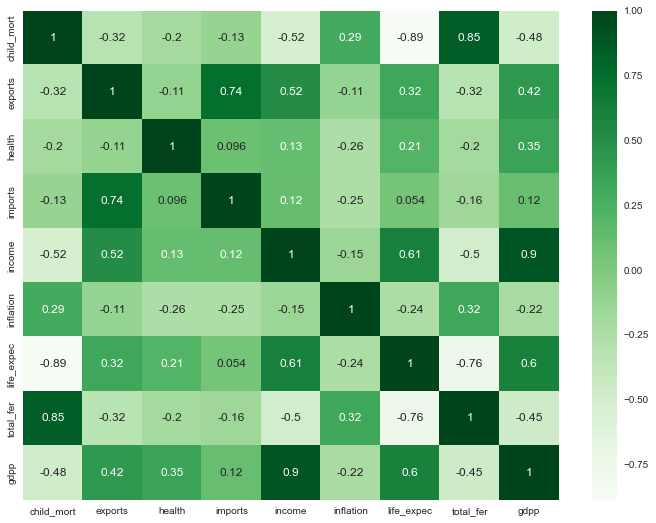

In [154]:
from matplotlib import pyplot as plt
import seaborn as sns
corr= df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="Greens",annot=True)
# جدول همبستگی زیر به ما نشان میدهد که در بین 2 جفت ستون وابستگی بالای 85 درصد وجود دارد
# پس میتوانیم آن هارا حذف کنیم ( یکی از هر جفت)
# قبل از حذف داده هارا نرمال سازی میکنیم 


In [155]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [156]:
from sklearn import preprocessing
names= df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].values

#نرمال سازی داده
scaler = preprocessing.StandardScaler()
df = scaler.fit(names).transform(names)
df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [157]:
df = pd.DataFrame(df, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
df
# تبدیل مجدد ارایه نامپای به دیتافریم پانداس برای راحتی کار

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [158]:
dff= pd.read_csv('Country-data.csv')
country= dff['country']
country 

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [159]:
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

<AxesSubplot:>

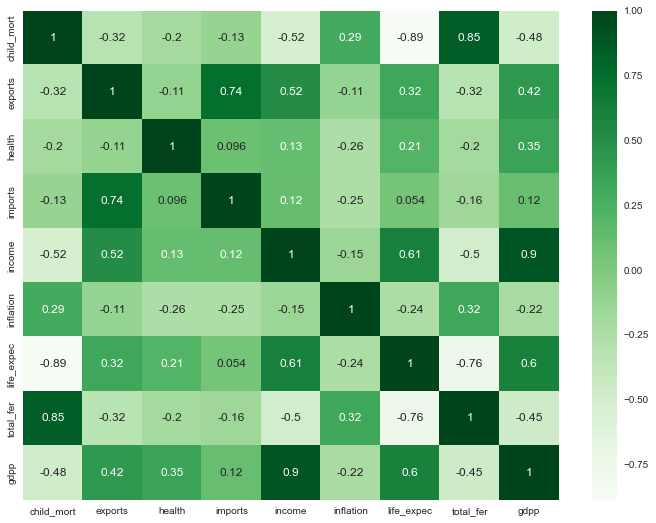

In [162]:
from matplotlib import pyplot as plt
import seaborn as sns
corr= df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap="Greens",annot=True)
# بعد از نرمال سازی هم روابط بین ستون ها مانند قبل است

In [340]:
df= df.drop(columns=['country','child_mort','gdpp'])
df
# دو ستون child mort , gdpp را حذف میکنیم 
# correlation bishtar az 0.85
# ستون کشور نیز عددی نیست برای راحتی محاسبات بعدی حذف میشود

,exports,health,imports,income,inflation,life_expec,total_fer
0,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,45.5,6.03,58.9,19100,1.44,76.8,2.13
...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62,63.0,3.50
163,28.5,4.91,17.6,16500,45.90,75.4,2.47
164,72.0,6.84,80.2,4490,12.10,73.1,1.95
165,30.0,5.18,34.4,4480,23.60,67.5,4.67


In [341]:
df.columns

Index(['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer'],
      dtype='object')

Text(0.5, 1.0, 'Elbow curve')

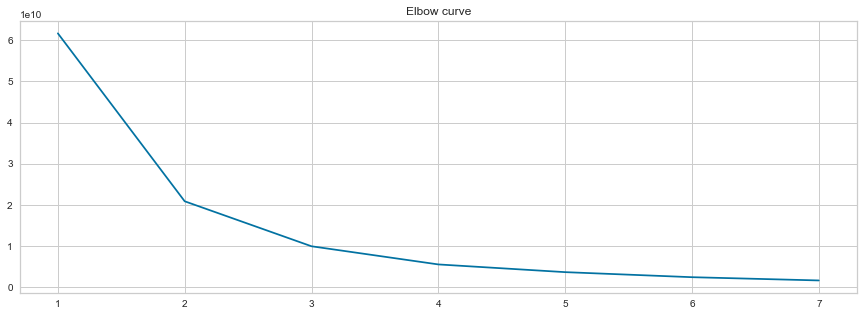

In [342]:
from sklearn.cluster import KMeans

X = df
distorsions = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 8), distorsions)
plt.grid(True)
plt.title('Elbow Curve')

# منحنی البو را برای بهترین عدد k میکشیم
# به دلیل مشخص نبودن عدد دقیق نمودار بعدی را میکشیم

from scipy.spatial.distance import cdist
#from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


x=df.loc[:, df.columns != 'country']

for n_clusters in range(30):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

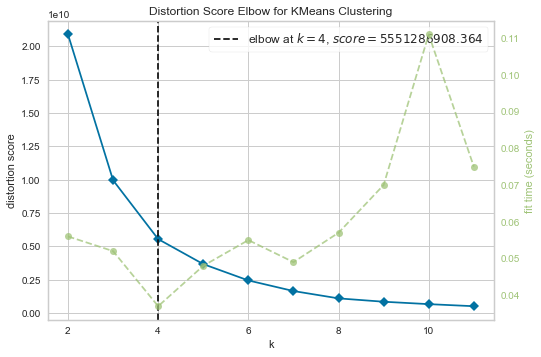

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [348]:
#from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

x = df
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()  

# به کمک این نمودار مشخص شد که بهترین عدد برای خوشه بندی 4 است

In [167]:
# so perfect k is 4 for kmeans clustering in elbow method.

In [355]:
from sklearn.metrics import silhouette_score

# number of k is NOT important 
km = KMeans()
km.fit_predict(df)
score = silhouette_score(df , km.labels_ , metric='euclidean') 
print('Silhouette Score: %.3f' % score)

# سیلو اسکور 0.6 است 
# هرچه این عدد به 1 نزدیکتر باشد خوشه ها قابل جداسازی تر هستند
# اگر منفی باشد یعنی خیلی در هم تنیده یا پخش هستند

Silhouette Score: 0.606


IndexError: index 2 is out of bounds for axis 0 with size 2

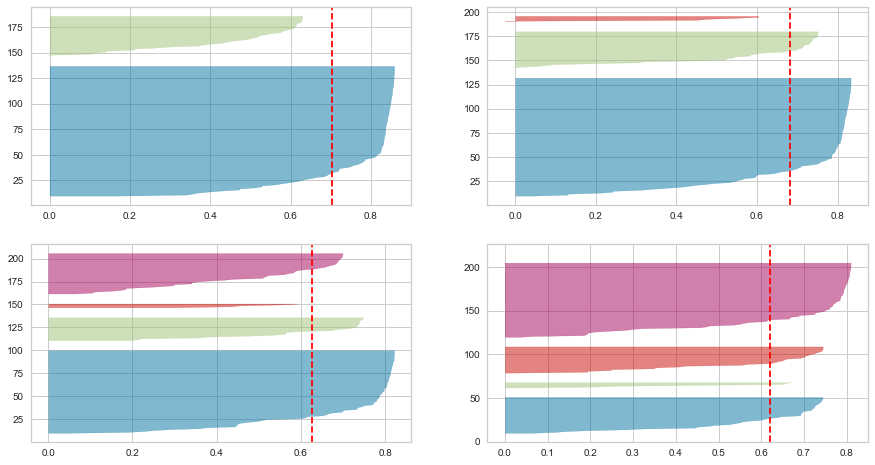

In [356]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5,6,7,8,9,10]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', random_state=42) #n_init=10, max_iter=100, 
    q, mod = divmod(i, 2)
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 
    
    # این عدد را برای چند خوشه بندی دیگر مصور سازی میکنیم 

In [361]:
modell = KMeans(n_clusters=4 , init='k-means++',random_state= 11)

# re-fit our model
x = df
modell.fit(x)

# compute an average silhouette score for each point
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)

from sklearn.metrics import silhouette_samples
silhouette_score_individual = silhouette_samples(x, modell.predict(x))
# iterate through to find any negative values
for each_value in silhouette_score_individual:
    if each_value < 0:
        print(f'We have found a negative silhouette score: {each_value}')
        
        # دوباره برای تعداد خوشه از 3 تا 6 این عدد را محاسبه میکنیم تا ببینیم از نظر این مقدار چه تعداد خوشه بندی بهتر است

0.6256450529037937


In [364]:
modell = KMeans(n_clusters=3 , init='k-means++',random_state= 11)

# re-fit our model
modell.fit(x)
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)


0.6825799593822859


In [359]:
modell = KMeans(n_clusters=5 , init='k-means++',random_state= 11)

# re-fit our model
modell.fit(x)
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)


0.6194447963998796


In [365]:
modell = KMeans(n_clusters=6 , init='k-means++',random_state= 11)

# re-fit our model
modell.fit(x)
silhouette_score_average = silhouette_score(x, modell.predict(x))
print(silhouette_score_average)


0.6113523111967423


In [370]:

bad_k_values = {}


possible_K_values = [i for i in range(2,15)]

for each_value in possible_K_values:
    
    
    model = KMeans(n_clusters=each_value, init='k-means++',random_state=30)
    model.fit(x)
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(x, model.predict(x))

    
    for each_silhouette in silhouette_score_individual:
        
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')


# یک روش دیگر برای پیدا کردن عدد مناسب silhouette score
# برای عدد 2 و 3 تعداد مقادیر منفی کمتر هست 
# برای جمع بندی تعداد خوشه بندی را طبق silhoutte score  
# عدد 3 قرار میدهیم 
# زیرا در این حالت بیشترین امتیاز سیلو یعنی بالاترین تراکم را دارد 


 This Many Clusters: 2 | Number of Negative Values: 1
 This Many Clusters: 3 | Number of Negative Values: 2
 This Many Clusters: 9 | Number of Negative Values: 1
 This Many Clusters: 12 | Number of Negative Values: 1
 This Many Clusters: 14 | Number of Negative Values: 1


from sklearn.cluster import KMeans

data = {'x': ,
        'y':  }
  
df = pd.DataFrame(data, columns=['x', 'y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

fig, axs = plt.subplots(2)
fig.suptitle('Optimal number of clusters')
axs[0].plot(k , sil_score)
axs[0].scatter(k , sil_score, marker='x', color = 'red')
axs[0].set_ylabel('sil_score')
axs[0].set_xticks(k)
axs[1].plot(k , inertia_list)
axs[1].scatter(k , inertia_list, marker='x', color = 'red')
axs[1].set_ylabel('inertia')
axs[1].set_xticks(k)
axs[1].set_xlabel('k')

from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(25,20))
axli = ax.flatten()
j = 0
for i in [ 3,4,5,6,7]:
  '''
    Create KMeans instance for different number of clusters
  '''
  km = KMeans(n_clusters=i, init='k-means++', 
        n_init=10,   max_iter=100, random_state=42)
  '''
  Create SilhouetteVisualizer instance with KMeans instance
  Fit the visualizer
  '''
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', 
               ax=   axli[j] )
  visualizer.fit(x)
  visualizer.finalize()
  j+=1

In [371]:
#x= x.drop(columns=['child_mort','gdpp'])
x.columns

Index(['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer'],
      dtype='object')

In [372]:
def KMeans_cluster(data, k):
    my_kmeans = KMeans(n_clusters= k)
    my_kmeans.fit(data) 
    clusters = my_kmeans.predict(data) 
    centroids = my_kmeans.cluster_centers_
    return clusters  #pd.DataFrame(centroids)

# تعریف خوشه بندی کامینز که به ما تعلق هر سطر را اعلام میکند

In [377]:
label_sil = KMeans_cluster(df, 3)
label_sil

# یک بار 3 خوشه در نظر میگیریم طبق نتایج بالا 
# و نمودار را برای خوشه 3 تایی رسم میکنیم 
# tenghe silhoutte score 

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [378]:
label_el = KMeans_cluster(df, 4)
label_el

# یک بار طبق elbow 
# تعداد خوشه را 4 در نظر میگیریم 

array([0, 0, 3, 0, 3, 3, 0, 1, 1, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0, 0, 0, 3,
       3, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 3, 3, 1, 3, 1, 0, 1, 0, 3, 0, 0, 2, 0, 0, 3, 3, 0,
       0, 3, 3, 2, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 3, 0, 0, 0, 3, 3, 2, 3, 3, 0, 0, 1, 0, 3, 3,
       0, 2, 3, 3, 0, 0, 3, 1, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 1, 1, 1, 3, 0, 0, 3, 0, 0, 0])

#filter rows of original data
filtered_label2 = df[label == 0]
 
#filtered_label8 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
#plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
#plt.show()

plt.scatter(x[:, 0], x[:, 1], c=labels,s=50, cmap='viridis');

labels = kmeans.fit_predict(x)
 
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(x[label == i , 0].values , x[label == i , 1].values , label = i)
plt.legend()
plt.show()

In [379]:
x["label_el"] = label_el
x["label_sil"] = label_sil
x

# دو لیبل مورد نظر سوال را به دیتا اضافه میکنیم 
# برای هر سطر خوشه مشخص است

,exports,health,imports,income,inflation,life_expec,total_fer,label_el,label_sil
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,0,1
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,0,1
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,3,1
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,0,1
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,3,1
...,...,...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62,63.0,3.50,0,1
163,28.5,4.91,17.6,16500,45.90,75.4,2.47,3,1
164,72.0,6.84,80.2,4490,12.10,73.1,1.95,0,1
165,30.0,5.18,34.4,4480,23.60,67.5,4.67,0,1


In [381]:
print(x.loc[x.label_el==0].count()[0:1])
print(x.loc[x.label_el==1].count()[0:1])
print(x.loc[x.label_el==2].count()[0:1])
print(x.loc[x.label_el==3].count()[0:1])

print(x.loc[x.label_sil==0].count()[0:1])
print(x.loc[x.label_sil==1].count()[0:1])
print(x.loc[x.label_sil==2].count()[0:1])

# تعداد خوشه ها در هر مدل را به اختصار در پایین نشان دادیم

exports    91
dtype: int64
exports    26
dtype: int64
exports    5
dtype: int64
exports    45
dtype: int64
exports    38
dtype: int64
exports    123
dtype: int64
exports    6
dtype: int64


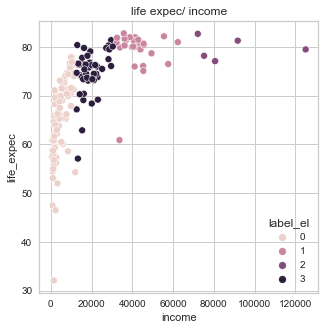

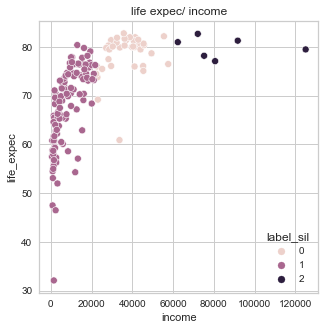

In [382]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=(x['life_expec'])
                ,x=x['income'],data=x,hue='label_el').set_title("life expec/ income");
plt.figure(figsize=(5,5))
sns.scatterplot(y=(x['life_expec'])
                ,x=x['income'],data=x,hue='label_sil').set_title("life expec/ income");

# پلات کردن امتحانی دو تا از ستون ها
# همینطور که میبینید در کامینز یک نوع خوشه بندی شده 
# فقط برای خوشه بیشتر ، یک قسمت آن به دو خوشه تقسیم شده

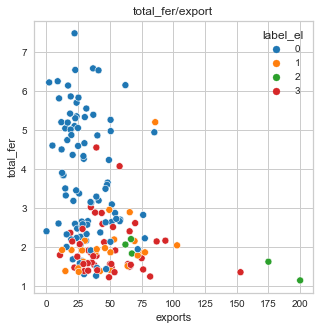

In [383]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=x['total_fer']
                ,x=x['exports'],palette='tab10', data=x,hue='label_el').set_title("total_fer/export");

# پلات دو ستون دیگر
# در اینجا بیشتر پراکندگی مشاهده میشود

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


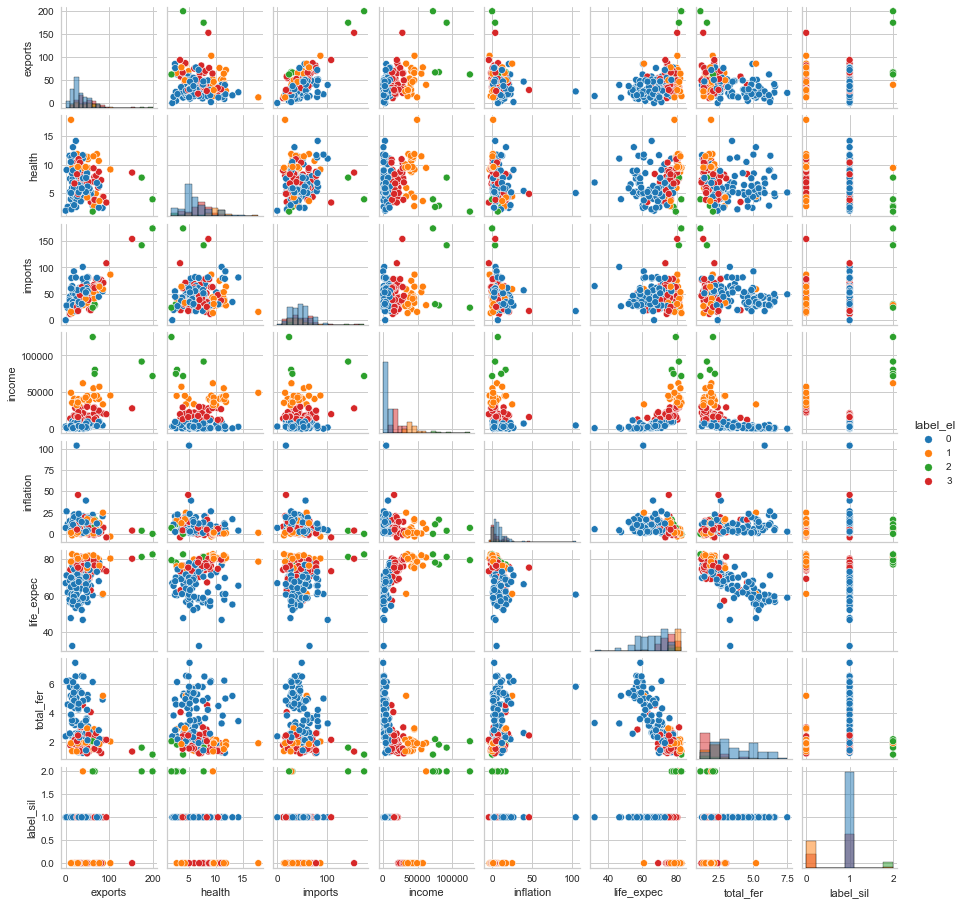

In [384]:
sns.pairplot(x, hue='label_el', diag_kind="hist", size=1.6, palette='tab10');
# هیستوگرام کل ستون ها نسبت به هم طبق خوشه بندی 4 تایی
# از اینحا 3 ستون انتخاب میکنیم و 2 به 2 قیاس میکنیم


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


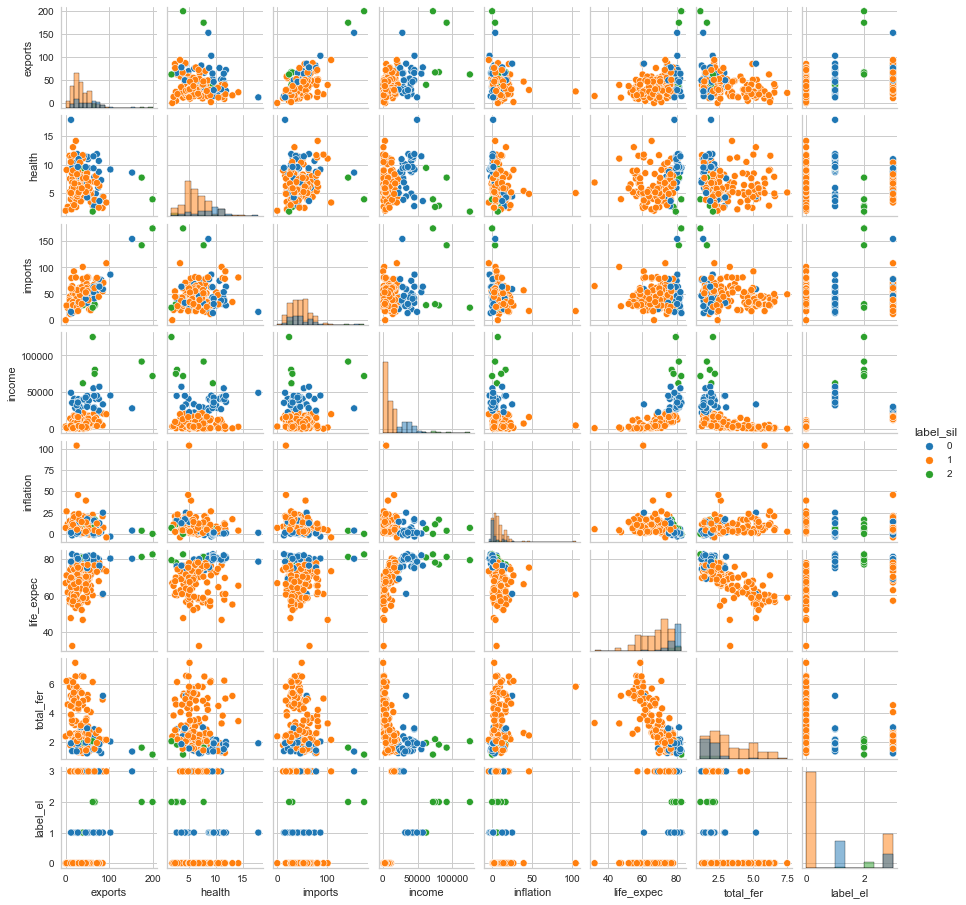

In [391]:
sns.pairplot(x, hue='label_sil', diag_kind="hist", size=1.6, palette='tab10');
# هیستوگرام همه ستون ها نسبت به هم 
# در خوشه بندی 3 تایی

----------------------------------------------------------------> GMM <---------------------------------------------------------------------

In [522]:
x = pd.DataFrame(df, columns = ['exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer','label_sil','label_el'])
x

#اگر اینجا ایکس کار نکرد از دستور زیر استفاده شود 
# x = df.drop(columns=['label_el', 'label_sil'])
# هدف بازگردانی داده به حالتی که ستون های پاکسازی شده بدون شماره خوشه بندی مرحله قبل روی آن باشد 
# آماده سازی برای الگوریم gmm

,exports,health,imports,income,inflation,life_expec,total_fer,label_sil,label_el
0,10.0,7.58,44.9,1610,9.44,NaN,NaN,NaN,NaN
1,28.0,6.55,48.6,9930,4.49,NaN,NaN,NaN,NaN
2,38.4,4.17,31.4,12900,16.10,NaN,NaN,NaN,NaN
3,62.3,2.85,42.9,5900,22.40,NaN,NaN,NaN,NaN
4,45.5,6.03,58.9,19100,1.44,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62,NaN,NaN,NaN,NaN
163,28.5,4.91,17.6,16500,45.90,NaN,NaN,NaN,NaN
164,72.0,6.84,80.2,4490,12.10,NaN,NaN,NaN,NaN
165,30.0,5.18,34.4,4480,23.60,NaN,NaN,NaN,NaN


In [520]:
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=3 ,random_state= 21)
# re-fit our model
x_gmm= x.drop(columns=['label_sil','label_el'])
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

#محاسبه silhoutte score برای تعداد خوشه متفاوت

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [407]:
gmm_model = GaussianMixture(n_components=4 ,random_state= 21)
# re-fit our model
x_gmm= x.drop(columns=['label_sil','label_el'])
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.3756031730847887


In [408]:
gmm_model = GaussianMixture(n_components=5 ,random_state= 21)
# re-fit our model
x_gmm= x.drop(columns=['label_sil','label_el'])
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.3339580012647932


In [411]:
gmm_model = GaussianMixture(n_components=6 ,random_state= 21)
# re-fit our model
x_gmm= x.drop(columns=['label_sil','label_el'])
gmm_model.fit(x_gmm)
silhouette_score_average = silhouette_score(x_gmm, gmm_model.predict(x_gmm))
print(silhouette_score_average)

0.2898339441116912


In [413]:
from sklearn.mixture import GaussianMixture

nclusters=4
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(x_gmm)

# predict the cluster for each data point
label_gmm = gmm.predict(x_gmm)
label_gmm

#طبق اعداد خوشه 4 مناسب است
# پس خوشه بندی 4 تایی را با الگوریتم مورد نظر فیت میکنیم
# سپس لیبل بدست آمده را به دیتافریم اضافه میکنیم

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 2, 3, 0, 0, 0, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 3, 1, 0, 3, 0, 1, 1, 0, 0, 3, 1, 0, 1, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 2, 0, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       1, 1, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 1, 2, 3, 3, 0, 0, 1, 0, 3, 3,
       0, 2, 3, 1, 0, 0, 1, 1, 0, 3, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0, 3, 3,
       0, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 0], dtype=int64)

In [414]:
x_gmm['label_gmm'] = label_gmm
x_gmm


#باقی مراحل به صورتی که تا اینجا توضیح داده شد برای 
# spectral 
# و gmm
# انجام میشود

# یعنی محاسبه عدد silhoutte
# سپس انتخاب تعداد خوشه از میان چند آزمون
# اعمال خوشه بندی
# اضافه کردن خوشه ها به دیتا فریم
# پلات کردن ستون ها به صورت 2 به 2

,exports,health,imports,income,inflation,life_expec,total_fer,label_gmm
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,0
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,3
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,3
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,0
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,3
...,...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62,63.0,3.50,0
163,28.5,4.91,17.6,16500,45.90,75.4,2.47,0
164,72.0,6.84,80.2,4490,12.10,73.1,1.95,3
165,30.0,5.18,34.4,4480,23.60,67.5,4.67,0


In [415]:
print(x_gmm.loc[x_gmm.label_gmm==0].count()[0:1])
print(x_gmm.loc[x_gmm.label_gmm==1].count()[0:1])
print(x_gmm.loc[x_gmm.label_gmm==2].count()[0:1])
print(x_gmm.loc[x_gmm.label_gmm==3].count()[0:1])

exports    63
dtype: int64
exports    30
dtype: int64
exports    5
dtype: int64
exports    69
dtype: int64


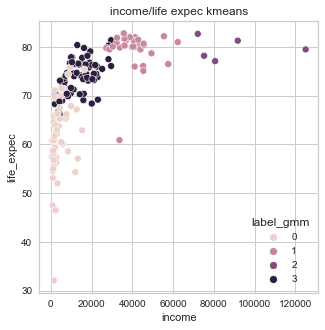

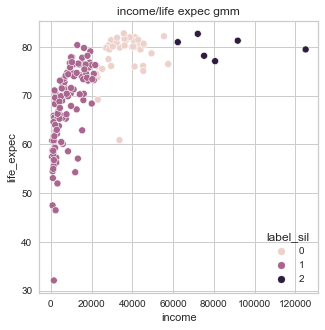

In [416]:
plt.figure(figsize=(5,5))
sns.scatterplot(y=(x_gmm['life_expec'])
                ,x=x_gmm['income'], data=x_gmm ,hue='label_gmm').set_title("income/life expec kmeans");

plt.figure(figsize=(5,5))
sns.scatterplot(y=(x['life_expec'])
                ,x=x['income'], data=x ,hue='label_sil').set_title("income/life expec gmm");



c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


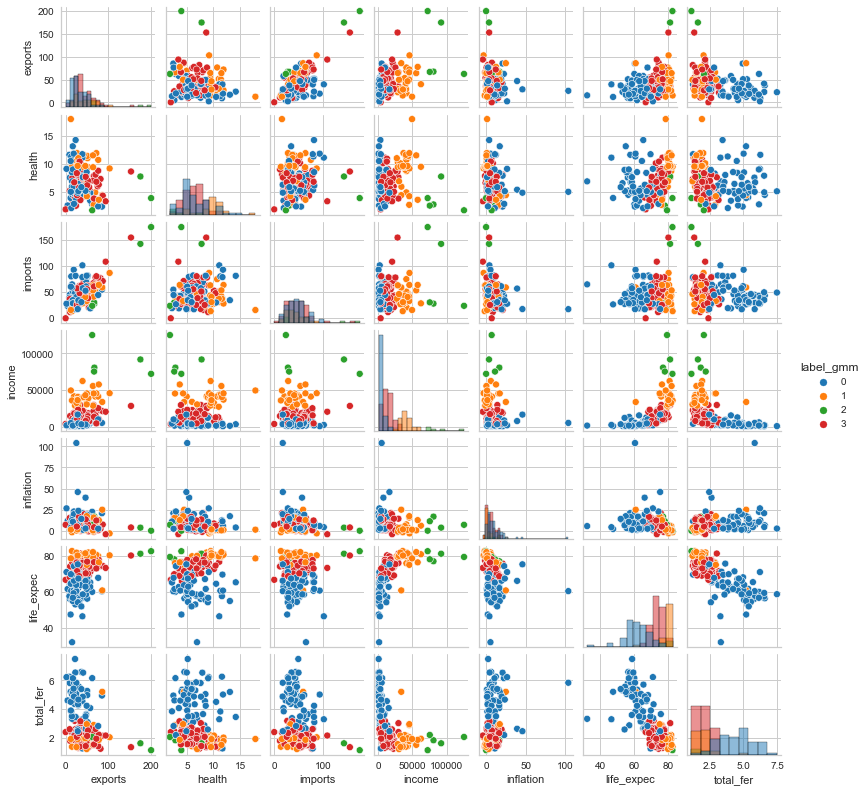

In [417]:
sns.pairplot(x_gmm, hue='label_gmm', diag_kind="hist", size=1.6, palette='tab10');

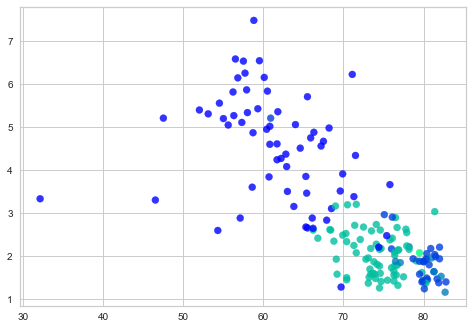

In [418]:
plt.scatter(x_gmm['life_expec'], x_gmm['total_fer'],  
           c = GaussianMixture(n_components = 5).fit_predict(x_gmm) ,cmap =plt.cm.winter, alpha = 0.8) 
plt.show()

In [216]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [224]:
n_clusters=np.arange(2, 8)
dff= df.drop(columns=['country'])
from sklearn import metrics
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(dff) 
        labels=gmm.predict(dff)
        sil=metrics.silhouette_score(dff, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

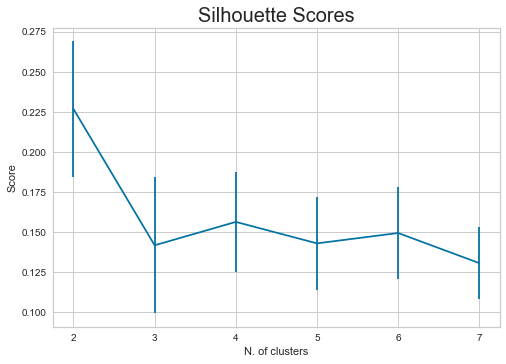

In [402]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: SPECTRAL CLUSTERING :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [424]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')  
# re-fit our model
x_spc= x.drop(columns=['label_sil','label_el'])
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.5099439642875412


In [420]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')  
# re-fit our model
x_spc= x.drop(columns=['label_sil','label_el'])
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.47566448873168327


In [421]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')  
# re-fit our model
x_spc= x.drop(columns=['label_sil','label_el'])
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.46285952248910395


In [422]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 5, affinity ='nearest_neighbors')  
# re-fit our model
x_spc= x.drop(columns=['label_sil','label_el'])
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.44005913124935236


In [423]:
from sklearn.cluster import SpectralClustering
spc_model = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors')  
# re-fit our model
x_spc= x.drop(columns=['label_sil','label_el'])
silhouette_score_average = silhouette_score(x_spc, spc_model.fit_predict(x_spc))
print(silhouette_score_average)

0.397873331514063


In [426]:
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(2,10)]
x_spc= x.drop(columns=['label_sil','label_el']) 

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = SpectralClustering(n_clusters = each_value , affinity ='nearest_neighbors')  
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(x_spc, model.fit_predict(x_spc))

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')


 This Many Clusters: 2 | Number of Negative Values: 28
 This Many Clusters: 3 | Number of Negative Values: 24
 This Many Clusters: 4 | Number of Negative Values: 22
 This Many Clusters: 5 | Number of Negative Values: 22
 This Many Clusters: 6 | Number of Negative Values: 25
 This Many Clusters: 7 | Number of Negative Values: 24
 This Many Clusters: 8 | Number of Negative Values: 20
 This Many Clusters: 9 | Number of Negative Values: 19


In [434]:
spectral_nn = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors')  
x_spc= x.drop(columns=['label_sil','label_el'])
label_spc = spectral_nn.fit_predict(x_spc)
label_spc

array([2, 0, 1, 0, 1, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1, 3, 0, 2, 0, 0, 0, 1,
       1, 3, 1, 2, 2, 2, 2, 3, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 3, 3,
       3, 0, 0, 0, 0, 3, 2, 1, 0, 3, 3, 1, 2, 0, 3, 0, 3, 0, 0, 2, 2, 0,
       2, 1, 3, 0, 0, 1, 1, 3, 3, 3, 0, 3, 0, 1, 2, 2, 3, 2, 0, 1, 1, 2,
       2, 3, 1, 3, 1, 2, 2, 1, 0, 2, 3, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2,
       3, 3, 2, 0, 3, 3, 0, 1, 0, 0, 0, 1, 3, 3, 1, 1, 2, 0, 3, 2, 1, 1,
       2, 3, 1, 3, 2, 1, 3, 3, 0, 0, 0, 1, 3, 3, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 2, 0, 3, 3, 3, 1, 0, 0, 1, 0, 0, 0])

In [435]:
x_spc['label_spc'] = label_spc
x_spc

,exports,health,imports,income,inflation,life_expec,total_fer,label_spc
0,10.0,7.58,44.9,1610,9.44,56.2,5.82,2
1,28.0,6.55,48.6,9930,4.49,76.3,1.65,0
2,38.4,4.17,31.4,12900,16.10,76.5,2.89,1
3,62.3,2.85,42.9,5900,22.40,60.1,6.16,0
4,45.5,6.03,58.9,19100,1.44,76.8,2.13,1
...,...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62,63.0,3.50,0
163,28.5,4.91,17.6,16500,45.90,75.4,2.47,1
164,72.0,6.84,80.2,4490,12.10,73.1,1.95,0
165,30.0,5.18,34.4,4480,23.60,67.5,4.67,0


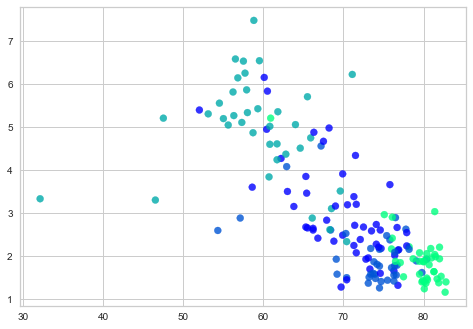

In [436]:
plt.scatter(x_spc['life_expec'], x_spc['total_fer'],  
           c = label_spc ,cmap =plt.cm.winter, alpha = 0.8) 
plt.show() 

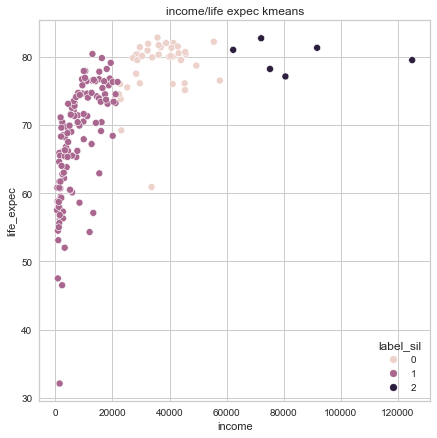

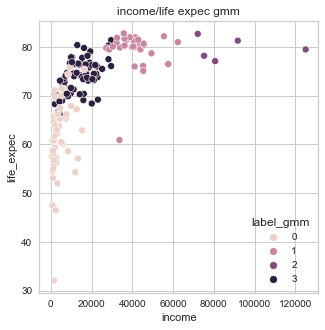

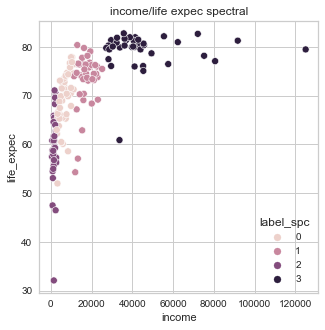

In [437]:
plt.figure(figsize=(7,7))
sns.scatterplot(y=(x['life_expec'])
                ,x=x['income'], data=x ,hue='label_sil').set_title("income/life expec kmeans");

plt.figure(figsize=(7,7))
sns.scatterplot(y=(x_gmm['life_expec'])
                ,x=x_gmm['income'], data=x_gmm ,hue='label_gmm').set_title("income/life expec gmm");

plt.figure(figsize=(7,7))
sns.scatterplot(y=(x_spc['life_expec'])
                ,x=x_spc['income'], data=x_spc ,hue='label_spc').set_title("income/life expec spectral");


In [438]:
silhouette_score(x_spc, label_spc)

0.4628595665469052

In [439]:
#from sklearn.neighbors import kneighbors_graph
# ساختن گراف مجاورت
# ساختن ارایه از روی گراف
from sklearn.neighbors import radius_neighbors_graph
A = radius_neighbors_graph(dff, 2, mode='connectivity', include_self=True)
#print(A)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [440]:
A

<167x167 sparse matrix of type '<class 'numpy.float64'>'
	with 3817 stored elements in Compressed Sparse Row format>

In [441]:
from scipy.sparse.csgraph import laplacian

g = np.array(A.toarray())
# پیدا کردن لاپلاسین ماتریس
laplacian(g)

array([[25., -0., -0., ..., -0., -0., -1.],
       [-0., 46., -0., ..., -0., -0., -0.],
       [-0., -0., 16., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., 24., -0., -0.],
       [-0., -0., -0., ..., -0., 10., -0.],
       [-1., -0., -0., ..., -0., -0., 22.]])

In [442]:
from numpy import linalg as LA
# پیدا کردن مقدار و بردار ویژه 
w, v = LA.eig(laplacian(g))

In [443]:
type(v)

numpy.ndarray

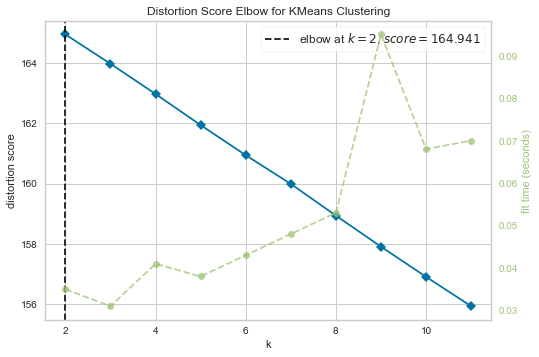

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [444]:
model = KMeans()
# پیاده سازی مدل و پیدا کردن تعداد خوشه بهینه
visualizer = KElbowVisualizer(model, k=(2,12))

#x = v
visualizer.fit(v)        # Fit the data to the visualizer
visualizer.show()  

In [445]:
v_label= KMeans_cluster(v,8)

# طبق نمودار بهترین عدد 8 است پس لیبل ها به صورت زیر میشود
v_label

array([3, 3, 7, 3, 3, 3, 3, 5, 3, 7, 3, 7, 7, 3, 0, 3, 3, 4, 3, 7, 3, 3,
       3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 5, 3, 3, 3, 3, 3, 0, 5,
       3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 7, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0,
       7, 0, 3, 1, 6, 7, 3, 3, 3, 4, 3, 3, 3, 7, 3, 3, 7, 3, 3, 3, 3, 7,
       3, 7, 3, 7, 3, 3, 4, 3, 3, 3, 7, 3, 3, 3, 3, 7, 3, 3, 0, 7, 3, 7,
       3, 3, 3, 7, 3, 7, 7, 3, 3, 3, 7, 3, 0, 7, 3, 7, 3, 0, 7, 3, 3, 3,
       3, 7, 3, 0, 3, 3, 3, 5, 7, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 7, 3, 7, 3, 7, 3, 7, 0, 3, 3])

In [446]:
bad_k_values = {}
possible_K_values = [i for i in range(2,10)]

for each_value in possible_K_values:
    model = SpectralClustering(n_clusters=each_value, affinity ='nearest_neighbors',random_state=30)
    #model.fit(v)
    silhouette_score_individual = silhouette_samples(v, model.fit_predict(v))
    
    for each_silhouette in silhouette_score_individual:
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' This Many Clusters: {key} | Number of Negative Values: {val}')


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API

 This Many Clusters: 2 | Number of Negative Values: 34
 This Many Clusters: 3 | Number of Negative Values: 61
 This Many Clusters: 4 | Number of Negative Values: 71
 This Many Clusters: 5 | Number of Negative Values: 80
 This Many Clusters: 6 | Number of Negative Values: 81
 This Many Clusters: 7 | Number of Negative Values: 76
 This Many Clusters: 8 | Number of Negative Values: 76
 This Many Clusters: 9 | Number of Negative Values: 82


c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [451]:
نتیجه کد بالا نیز نشان میدهد که در ازای خوشه های 7 یا 8 بهتر است 

In [447]:
spectral_nn_v = SpectralClustering(n_clusters = 8, affinity ='nearest_neighbors')  
label_spc_v = spectral_nn_v.fit_predict(v)
label_spc_v

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_spectral.py:507: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


array([0, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 1, 1, 0, 1, 5, 1, 1,
       3, 5, 1, 4, 1, 1, 0, 7, 1, 6, 7, 1, 0, 1, 7, 1, 1, 1, 0, 1, 6, 0,
       1, 1, 1, 5, 1, 1, 1, 6, 1, 0, 1, 5, 6, 4, 7, 1, 1, 1, 1, 1, 3, 4,
       5, 3, 7, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 5, 1, 4, 1, 1, 5,
       2, 5, 1, 5, 1, 1, 0, 7, 1, 1, 5, 1, 1, 2, 1, 5, 1, 1, 4, 5, 1, 5,
       1, 6, 1, 5, 1, 5, 5, 6, 1, 0, 5, 1, 1, 5, 1, 5, 1, 6, 5, 6, 1, 1,
       1, 5, 7, 3, 1, 1, 1, 6, 5, 1, 1, 1, 7, 1, 1, 1, 6, 1, 6, 1, 1, 1,
       1, 1, 1, 5, 1, 5, 1, 5, 7, 5, 1, 1, 7])

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


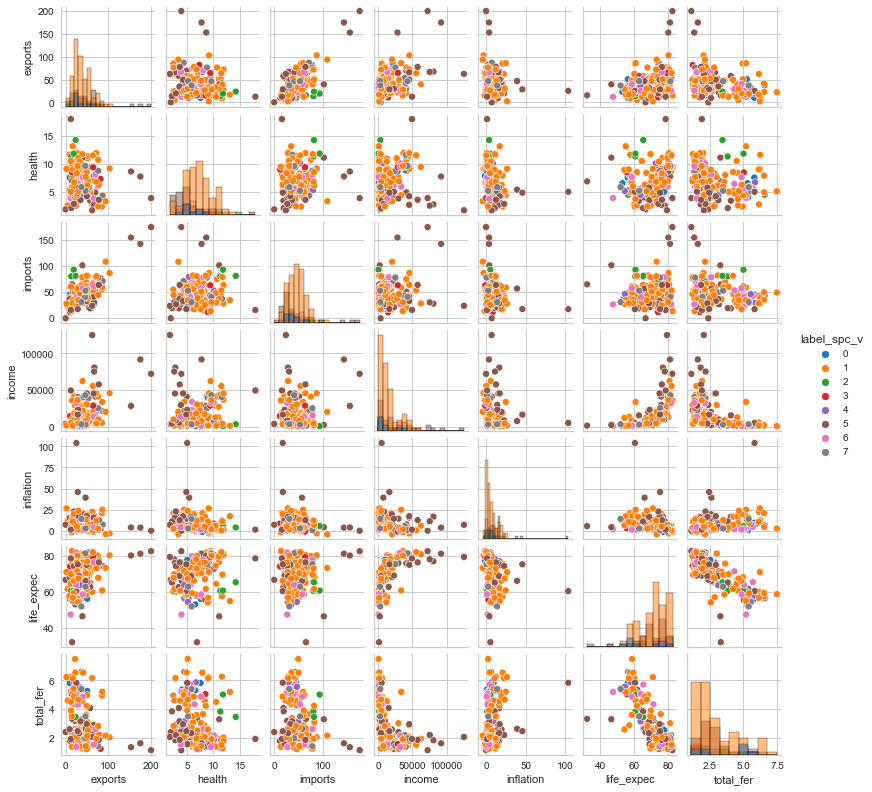

In [448]:
x_v= x_spc.drop(columns=['label_spc'])
x_v['label_spc_v']= label_spc_v
sns.pairplot(x_v , hue='label_spc_v', diag_kind="hist", size=1.6, palette='tab10');
# نمودار کشیده میشود
# اما طبق اعدادی هم که پیش از این داشتیم خوشه بندی خیلی مناسبی از این روش نخواهیم داشت
# خوشه ها پراکندگی بالا دارند

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


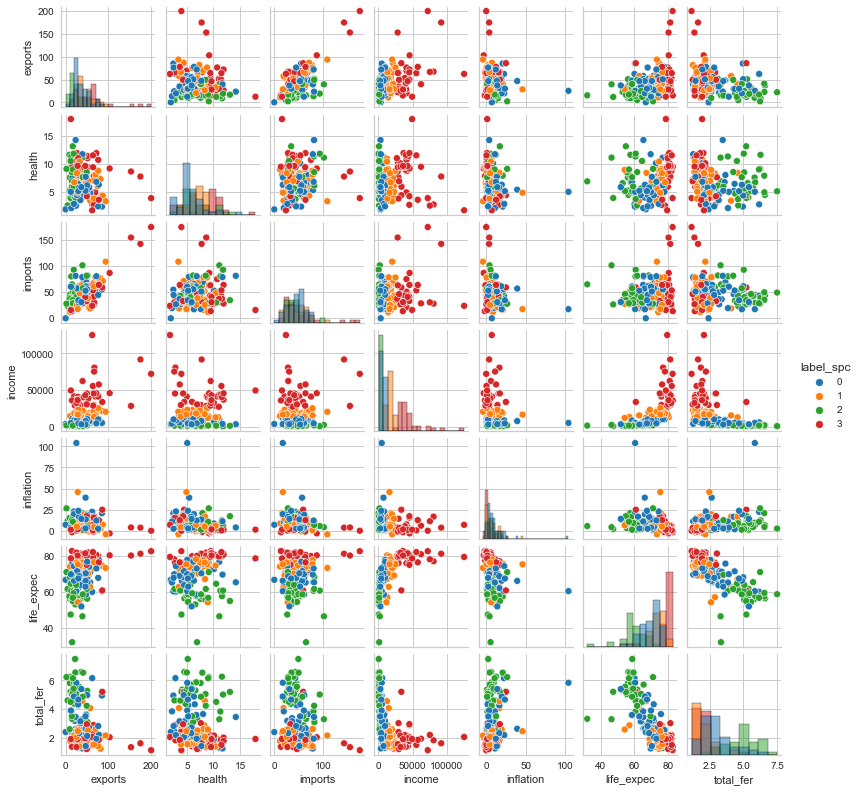

In [449]:
x_spc['label_spc']= label_spc
sns.pairplot(x_spc , hue='label_spc', diag_kind="hist", size=1.6, palette='tab10');
# خوشه بندی 4 تایی که برای الگوریتم اصلی spectral صورت گرفته

In [454]:
df = df.drop(columns=['label_el','label_sil'])

In [460]:
from sklearn.decomposition import PCA
# انتخاب ستون هایی که بیشترین میزان اطلاعات را دارند را از این طریق انتخاب میکنیم
pca = PCA(n_components=5)
pca.fit(df)

PCA(n_components=5)

In [461]:
pca.components_ 

array([[ 7.34829732e-04,  1.84629947e-05,  1.53720067e-04,
         9.99999674e-01, -8.10187973e-05,  2.82304560e-04,
        -3.94079599e-05],
       [ 6.94102988e-01, -5.27117398e-03,  7.17863068e-01,
        -6.24089763e-04, -5.32868191e-02, -2.49074713e-03,
        -4.44897563e-03],
       [ 5.57668477e-01, -1.06208354e-01, -4.91438014e-01,
        -2.56837648e-04,  6.55682828e-01, -7.58298708e-02,
         2.33265458e-02],
       [-4.31603236e-01,  3.38363049e-02,  4.67035108e-01,
         4.03896926e-04,  6.78918110e-01, -3.61576573e-01,
         5.27671945e-02],
       [ 1.15031648e-01, -8.24205064e-02, -1.38480620e-01,
         1.75471632e-04, -3.25007799e-01, -9.18578933e-01,
         1.06678686e-01]])

In [462]:
df

,exports,health,imports,income,inflation,life_expec,total_fer
0,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,45.5,6.03,58.9,19100,1.44,76.8,2.13
...,...,...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62,63.0,3.50
163,28.5,4.91,17.6,16500,45.90,75.4,2.47
164,72.0,6.84,80.2,4490,12.10,73.1,1.95
165,30.0,5.18,34.4,4480,23.60,67.5,4.67


In [463]:
names= df[['exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer']].values
#scaled_df = pd.DataFrame(d, columns=names)
#scaled_df.head()
scaler = preprocessing.StandardScaler()
df = scaler.fit(names).transform(names)
df
# حتما باید اول نرمالسازی شود ( با اینکه زودتر انجام دادیم محض احتیاط)

array([[-1.13827979,  0.27908825, -0.08245496, ...,  0.15733622,
        -1.61909203,  1.90288227],
       [-0.47965843, -0.09701618,  0.07083669, ..., -0.31234747,
         0.64786643, -0.85997281],
       [-0.09912164, -0.96607302, -0.64176233, ...,  0.78927429,
         0.67042323, -0.0384044 ],
       ...,
       [ 1.13030491,  0.0088773 ,  1.38003025, ...,  0.40973191,
         0.28695762, -0.66120626],
       [-0.40647827, -0.59727159, -0.5174718 , ...,  1.50091625,
        -0.34463279,  1.14094382],
       [-0.15034774, -0.33801514, -0.66247742, ...,  0.59001454,
        -2.09278484,  1.6246091 ]])

In [464]:
df = pd.DataFrame(df, columns = ['exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer'])
df

,exports,health,imports,income,inflation,life_expec,total_fer
0,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946
...,...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754
163,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678
164,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206
165,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944


In [508]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df)

array([[-2.52047205,  0.3174613 , -1.01357253, ...,  0.71076581,
        -0.07723466,  0.38146944],
       [ 0.43675179, -0.63170086, -0.08084384, ..., -0.81309805,
        -0.03333492,  0.26816294],
       [-0.35420207, -0.19973278,  1.3362972 , ..., -0.45901185,
        -0.47333311, -0.0669424 ],
       ...,
       [ 0.91027608,  1.29152554, -0.21045281, ..., -1.2800665 ,
        -0.06347249, -0.17804442],
       [-1.80947073,  0.32679536,  0.95530609, ..., -0.19379021,
        -0.49273757,  0.02752817],
       [-2.55177104,  0.86508939, -0.13620683, ...,  0.79445776,
         0.44487669, -0.52643943]])

In [509]:
pca.get_covariance()

array([[ 1.0060241 , -0.11509761,  0.74182289,  0.51989676, -0.10794074,
         0.3182181 , -0.32193832],
       [-0.11509761,  1.0060241 ,  0.09629328,  0.1303592 , -0.2569142 ,
         0.21196135, -0.19785877],
       [ 0.74182289,  0.09629328,  1.0060241 ,  0.12314364, -0.2484822 ,
         0.05471819, -0.16000656],
       [ 0.51989676,  0.1303592 ,  0.12314364,  1.0060241 , -0.14864609,
         0.61564899, -0.50486319],
       [-0.10794074, -0.2569142 , -0.2484822 , -0.14864609,  1.0060241 ,
        -0.24114897,  0.31883023],
       [ 0.3182181 ,  0.21196135,  0.05471819,  0.61564899, -0.24114897,
         1.0060241 , -0.76545827],
       [-0.32193832, -0.19785877, -0.16000656, -0.50486319,  0.31883023,
        -0.76545827,  1.0060241 ]])

In [510]:
explained_variance=pca.explained_variance_ratio_
explained_variance

# درصد واریانس به ترتیب زیر است 
# همینطور که دیده میشود از بین 7 ستون 
# پنج ستون اول بالاترین پراکندگی رو دارند
# این داده های به این شکل رو باید نگه داشت
# که شامل 95 درصد اطلاعات میباشد
# دو مورد آخر کمتر از 1 درصد هست پراکندگی
# پس حذف میکنیم


array([0.40765993, 0.20754376, 0.16367519, 0.10413919, 0.07108605,
       0.03049973, 0.01539615])

No handles with labels found to put in legend.


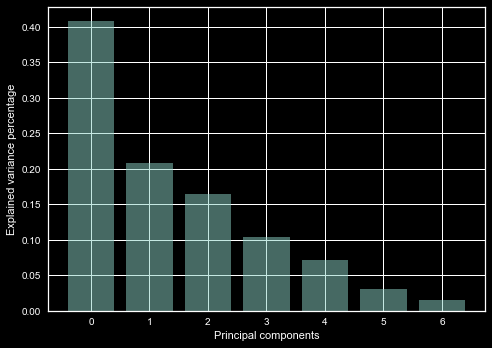

In [511]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(7, 5))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center')
    plt.ylabel('Explained variance percentage')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
    # نمودار خواسته شده صورت سوال

In [502]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(df)
X_new

array([[-2.52047205e+00,  3.17461302e-01, -1.01357253e+00,
         4.04033076e-01,  7.10765812e-01],
       [ 4.36751793e-01, -6.31700863e-01, -8.08438382e-02,
        -5.58358509e-01, -8.13098053e-01],
       [-3.54202074e-01, -1.99732781e-01,  1.33629720e+00,
        -2.95617261e-01, -4.59011847e-01],
       [-2.16183980e+00,  2.01379341e+00,  1.10209001e+00,
         2.84498180e-01,  5.93552001e-01],
       [ 9.59028666e-01,  4.47849304e-02, -9.32747509e-02,
        -6.18653037e-01, -2.93673413e-01],
       [-4.57388762e-01, -1.53855822e+00,  1.04308697e+00,
         8.42273618e-01, -4.34249744e-01],
       [-1.68304225e-01, -4.05969011e-01,  4.43364201e-01,
        -9.47171533e-01, -9.40780816e-01],
       [ 1.14682386e+00, -2.10285349e+00,  3.11613863e-01,
        -5.65234141e-02,  6.61412336e-01],
       [ 2.19946485e+00, -1.13593507e+00, -4.34861844e-01,
         7.03438661e-01,  4.18372924e-01],
       [-1.04815185e-01, -3.15847785e-01,  9.95662921e-01,
        -6.32649191e-02

In [503]:
pca.get_covariance()

array([[ 1.03224871, -0.10798172,  0.71983255,  0.50821923, -0.1110383 ,
         0.31244938, -0.32549792],
       [-0.10798172,  1.00788933,  0.09049503,  0.12679816, -0.25783788,
         0.21180629, -0.19766043],
       [ 0.71983255,  0.09049503,  1.02403021,  0.13394442, -0.24567096,
         0.05593028, -0.16001445],
       [ 0.50821923,  0.12679816,  0.13394442,  1.00887744, -0.14776418,
         0.6266508 , -0.49631629],
       [-0.1110383 , -0.25783788, -0.24567096, -0.14776418,  1.00628453,
        -0.23868003,  0.32072639],
       [ 0.31244938,  0.21180629,  0.05593028,  0.6266508 , -0.23868003,
         0.97698604, -0.78969497],
       [-0.32549792, -0.19766043, -0.16001445, -0.49631629,  0.32072639,
        -0.78969497,  0.98585242]])

In [504]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.40765993, 0.20754376, 0.16367519, 0.10413919, 0.07108605])

No handles with labels found to put in legend.


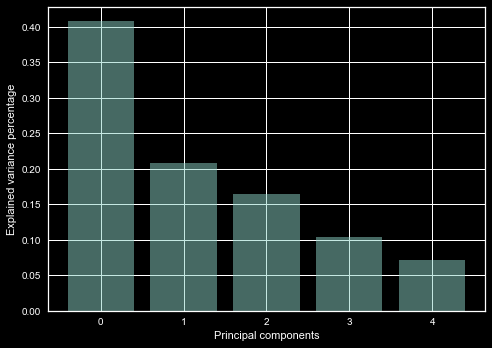

In [506]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(7,5))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center')
    plt.ylabel('Explained variance percentage')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
    # بعد از حذف 2 تای آخر دوباره مراحل رو برای چک کردن انجام دادیم 
    # به صورت زیر میبینیم که درست است 
    # دیگر حذف نمیکنیم چون با وجود اینکه ستون 5 ام درصد پایینی دارد 
    # اما نسبت به کل درصد کمی نیست 

In [512]:
df.columns

Index(['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer'],
      dtype='object')

In [518]:

df= x_gmm.drop(columns= ['label_gmm'])
df= df.drop(columns= ['life_expec','total_fer'])
df

,exports,health,imports,income,inflation
0,10.0,7.58,44.9,1610,9.44
1,28.0,6.55,48.6,9930,4.49
2,38.4,4.17,31.4,12900,16.10
3,62.3,2.85,42.9,5900,22.40
4,45.5,6.03,58.9,19100,1.44
...,...,...,...,...,...
162,46.6,5.25,52.7,2950,2.62
163,28.5,4.91,17.6,16500,45.90
164,72.0,6.84,80.2,4490,12.10
165,30.0,5.18,34.4,4480,23.60


In [ ]:
# دیتافریم به صورت بالا تبدیل میشود
# از این نقطه به بعد دیتای بالا را در فایل جدا گانه به نام 
# ml4 pca 
# ذخیزه شده و تمامی مراحل بالا یک بار بر روی این داده انجام شده است
# در آن فایل توضیحات مشابه اینحاست 
# لذا نوشته نشده است

# باتشکر
# 401112106
# hadis haghshenas